In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
%matplotlib inline

In [2]:
plt.rcParams['figure.figsize'] = 40,30
plt.rcParams['axes.linewidth'] = 2.0
plt.rcParams['savefig.dpi'] = 500
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42
np.set_printoptions(legacy='1.25')

# Import Data

## Load MCC data for Results_grid 1 2 & 3

In [3]:
os.chdir("/home/cadeniran/u1/amphiscan-pep/")

# Define your lists
pdbid=[]
dir='/home/cadeniran/u1/amphiscan-pep/results.1'
dirlist = [ item for item in os.listdir(dir) if os.path.isdir(os.path.join(dir, item)) ]
for dir in dirlist:
    pdbid.append(dir)
pdbid.sort()

pert_incre = ["0.5_10", "0.5_15", "0.5_20", "0.5_25", "0.5_30", "0.5_35", "0.5_40", "0.5_45", "0.5_50", "0.5_55", "0.5_60", "0.5_65", "0.5_70", "0.5_75", "0.5_80", "0.5_85", "0.5_90", "0.5_95", "0.5_100", "0.5_105", "0.5_110", "0.5_115", "0.5_120", "0.5_125", "0.5_130", "0.5_135", "0.5_140", "0.5_145", "0.5_150", "0.5_155", "0.5_160", "0.5_165", "0.5_170", "0.5_175", "0.5_180", "0.5_185", "0.5_190", "0.5_195", "0.5_200"]

In [4]:
# Build empty dictionary to hold the DataFrames
df_pep = {}

for i in pert_incre:
    df_pep[str(i)] = pd.DataFrame()

In [5]:
# Import data for Results_Grid.1 2 & 3
for i in pert_incre:
    df_pep[str(i)]['ID'] = pdbid
    for j in range(1,4):
        mcc=[]
        for p in pdbid:
            with open('results_grid.{}/{}/results/{}/txt/check_accuracy.txt'.format(j,i,p), 'r') as f:
                lines = f.read().splitlines()
                last_line = lines[-2]
                lastCol = last_line.split(sep=' ')[3]
                mcc.append(lastCol)
        df_pep[str(i)]['R.{}'.format(j)] = mcc
        # Remove MCC cannnot be calcaulated && %
        df_pep[str(i)] = df_pep[str(i)].replace('be', np.nan).replace('%', '', regex=True)
    df_pep[str(i)]['R.1'] = pd.to_numeric(df_pep[str(i)]['R.1'])
    df_pep[str(i)]['R.2'] = pd.to_numeric(df_pep[str(i)]['R.2'])
    df_pep[str(i)]['R.3'] = pd.to_numeric(df_pep[str(i)]['R.3'])


In [6]:
dfr1, dfr2, dfr3 = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
dfr1['ID'], dfr2['ID'], dfr3['ID'] = pdbid, pdbid, pdbid

for i in pert_incre:
    dfr1[str(i)] = df_pep[str(i)]['R.1']
    dfr2[str(i)] = df_pep[str(i)]['R.2']
    dfr3[str(i)] = df_pep[str(i)]['R.3']

## Make Plot: Results_grid.1 

In [7]:
dfr1.set_index('ID', inplace=True)

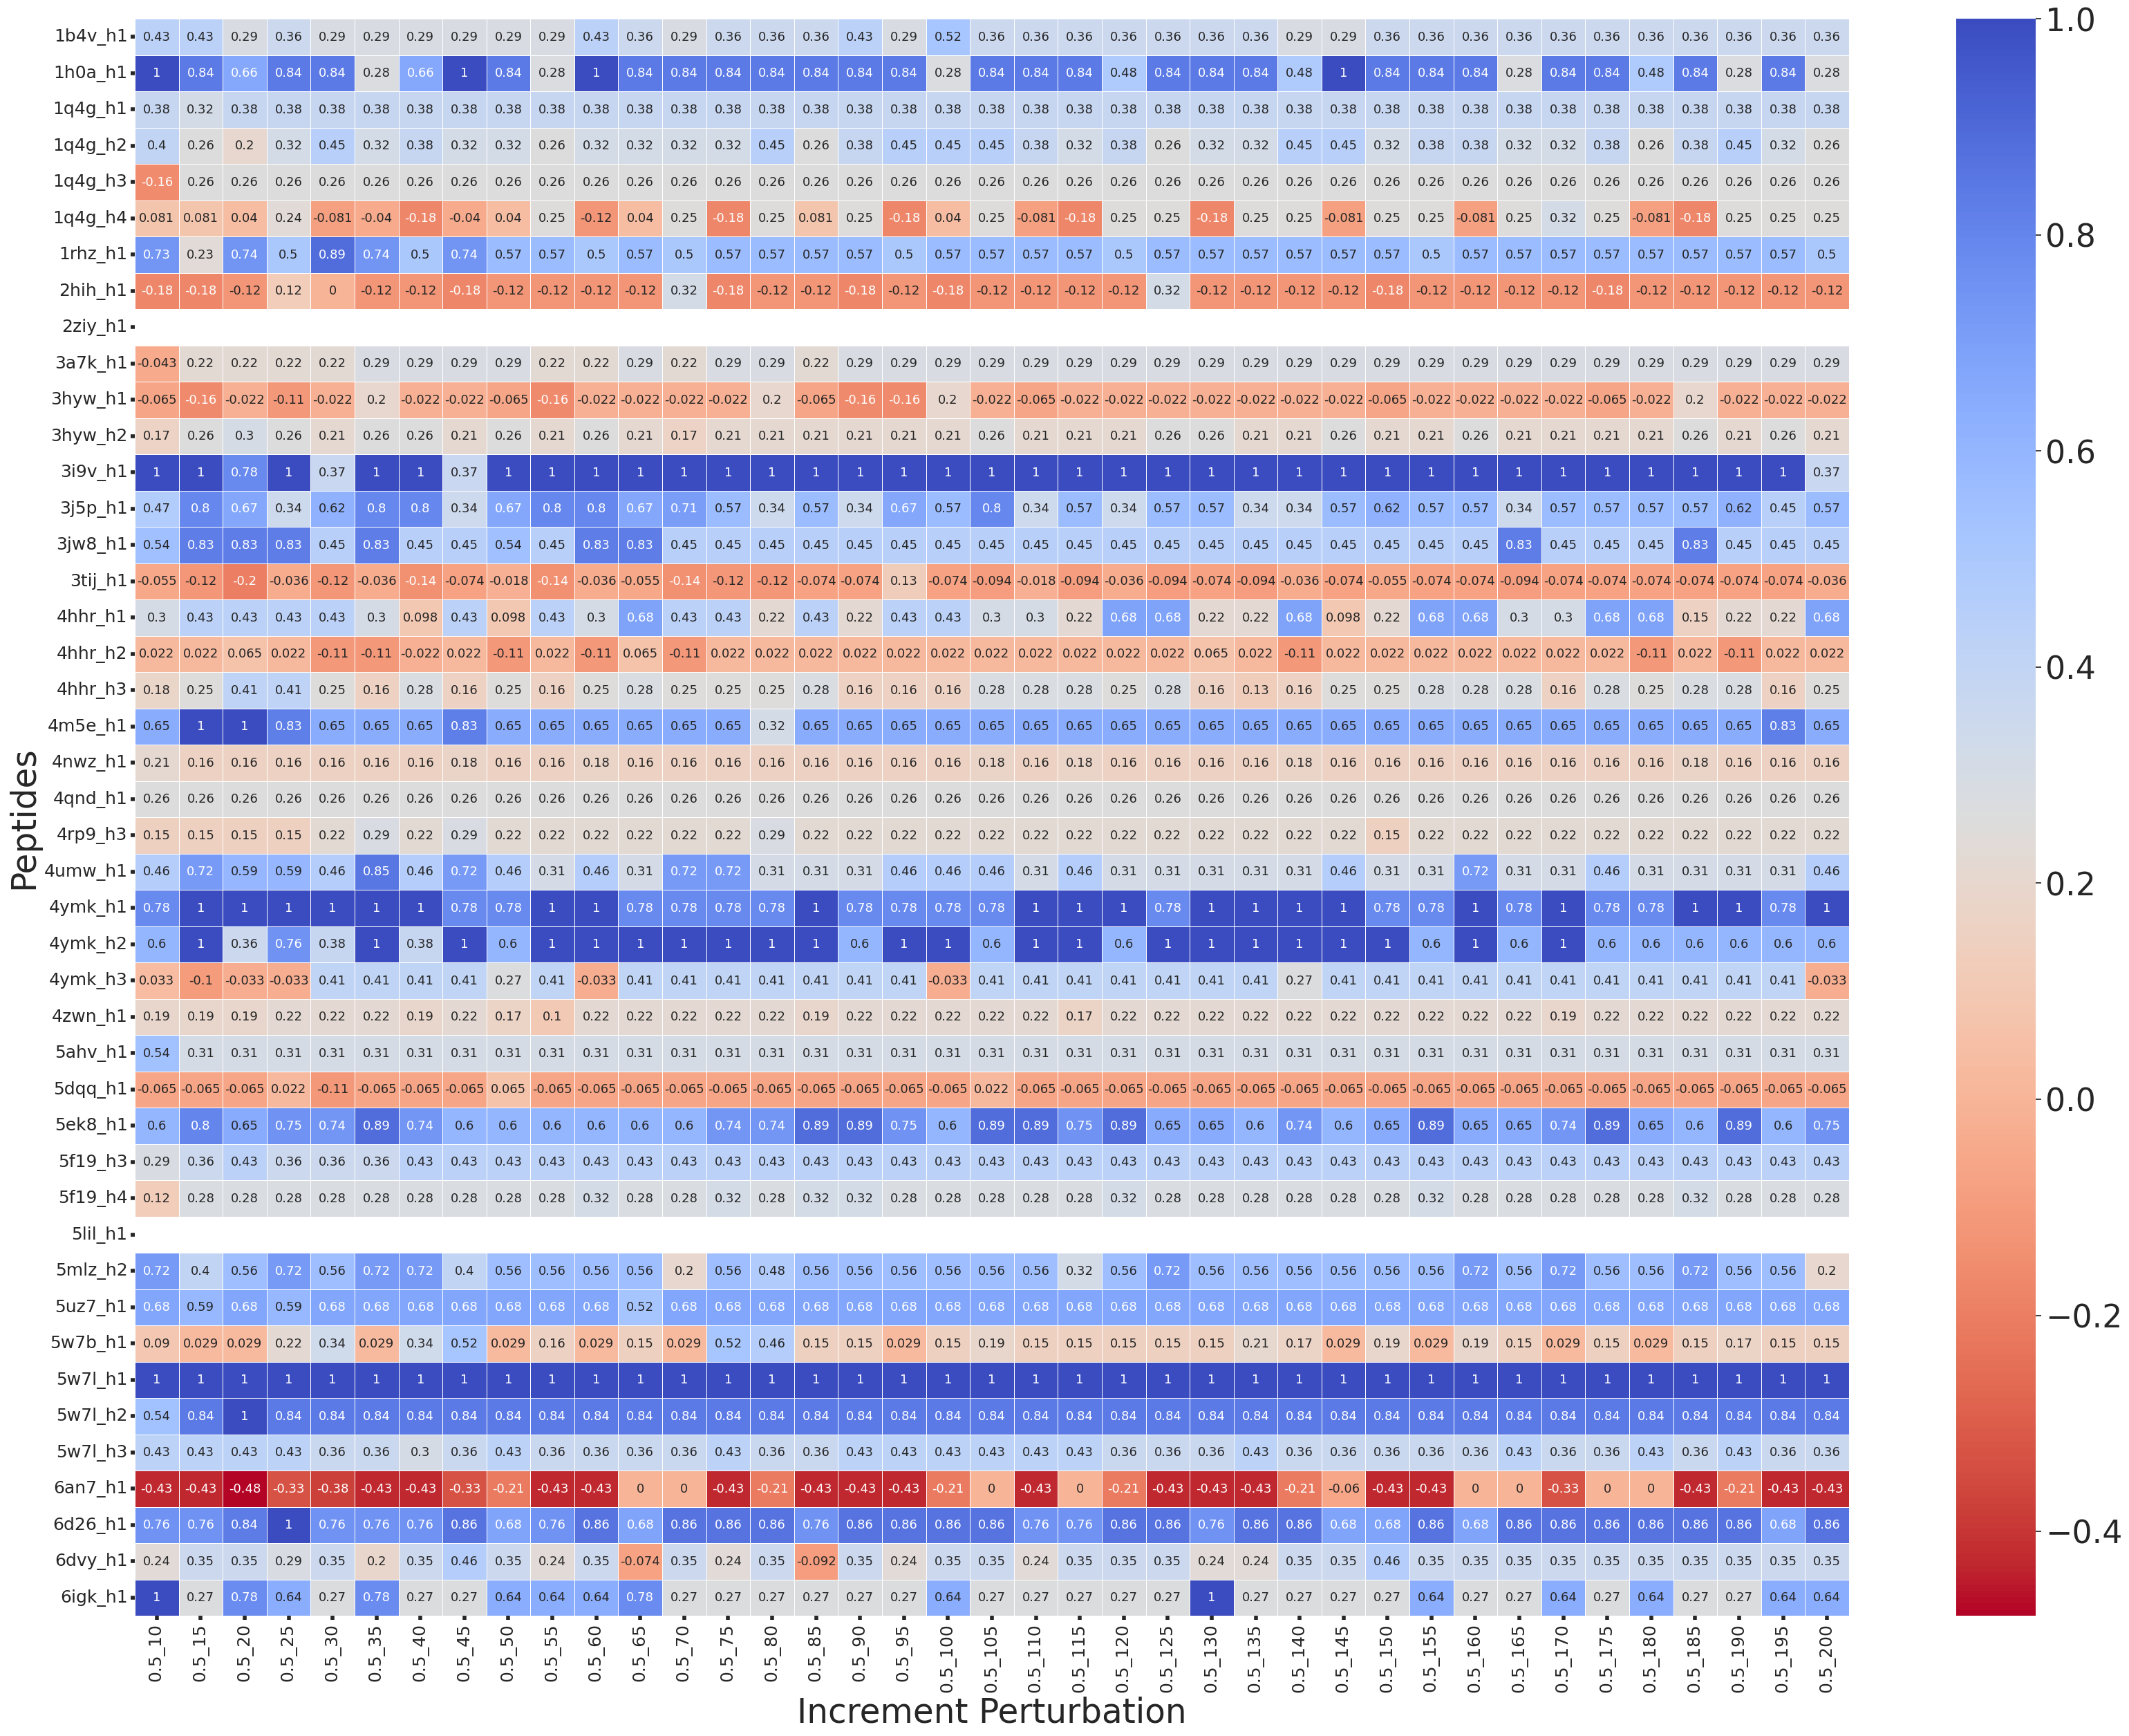

In [29]:
sns.set(font_scale=3)
sns.set_style('ticks')
sns.set_style('white', rc={'xtick.bottom': True,'ytick.left': True,})
sns.heatmap(dfr1, annot=True, linewidth=0.5, cmap="coolwarm_r", annot_kws={"fontsize":13},fmt='.2g')

plt.xlabel("Increment Perturbation", fontsize = 35)
plt.ylabel("Peptides", fontsize = 35)
plt.tick_params(axis='x', labelsize='18', length=4, width=4, rotation=90)
plt.tick_params(axis='y', labelsize='18', length=4, width=4, rotation=0)
#plt.savefig("/home/cadeniran/ipn/figs/heatmaprg1.png", format='png', transparent=True, bbox_inches='tight')

## Make Plot: Results_grid.2

In [10]:
dfr2.set_index('ID', inplace=True)

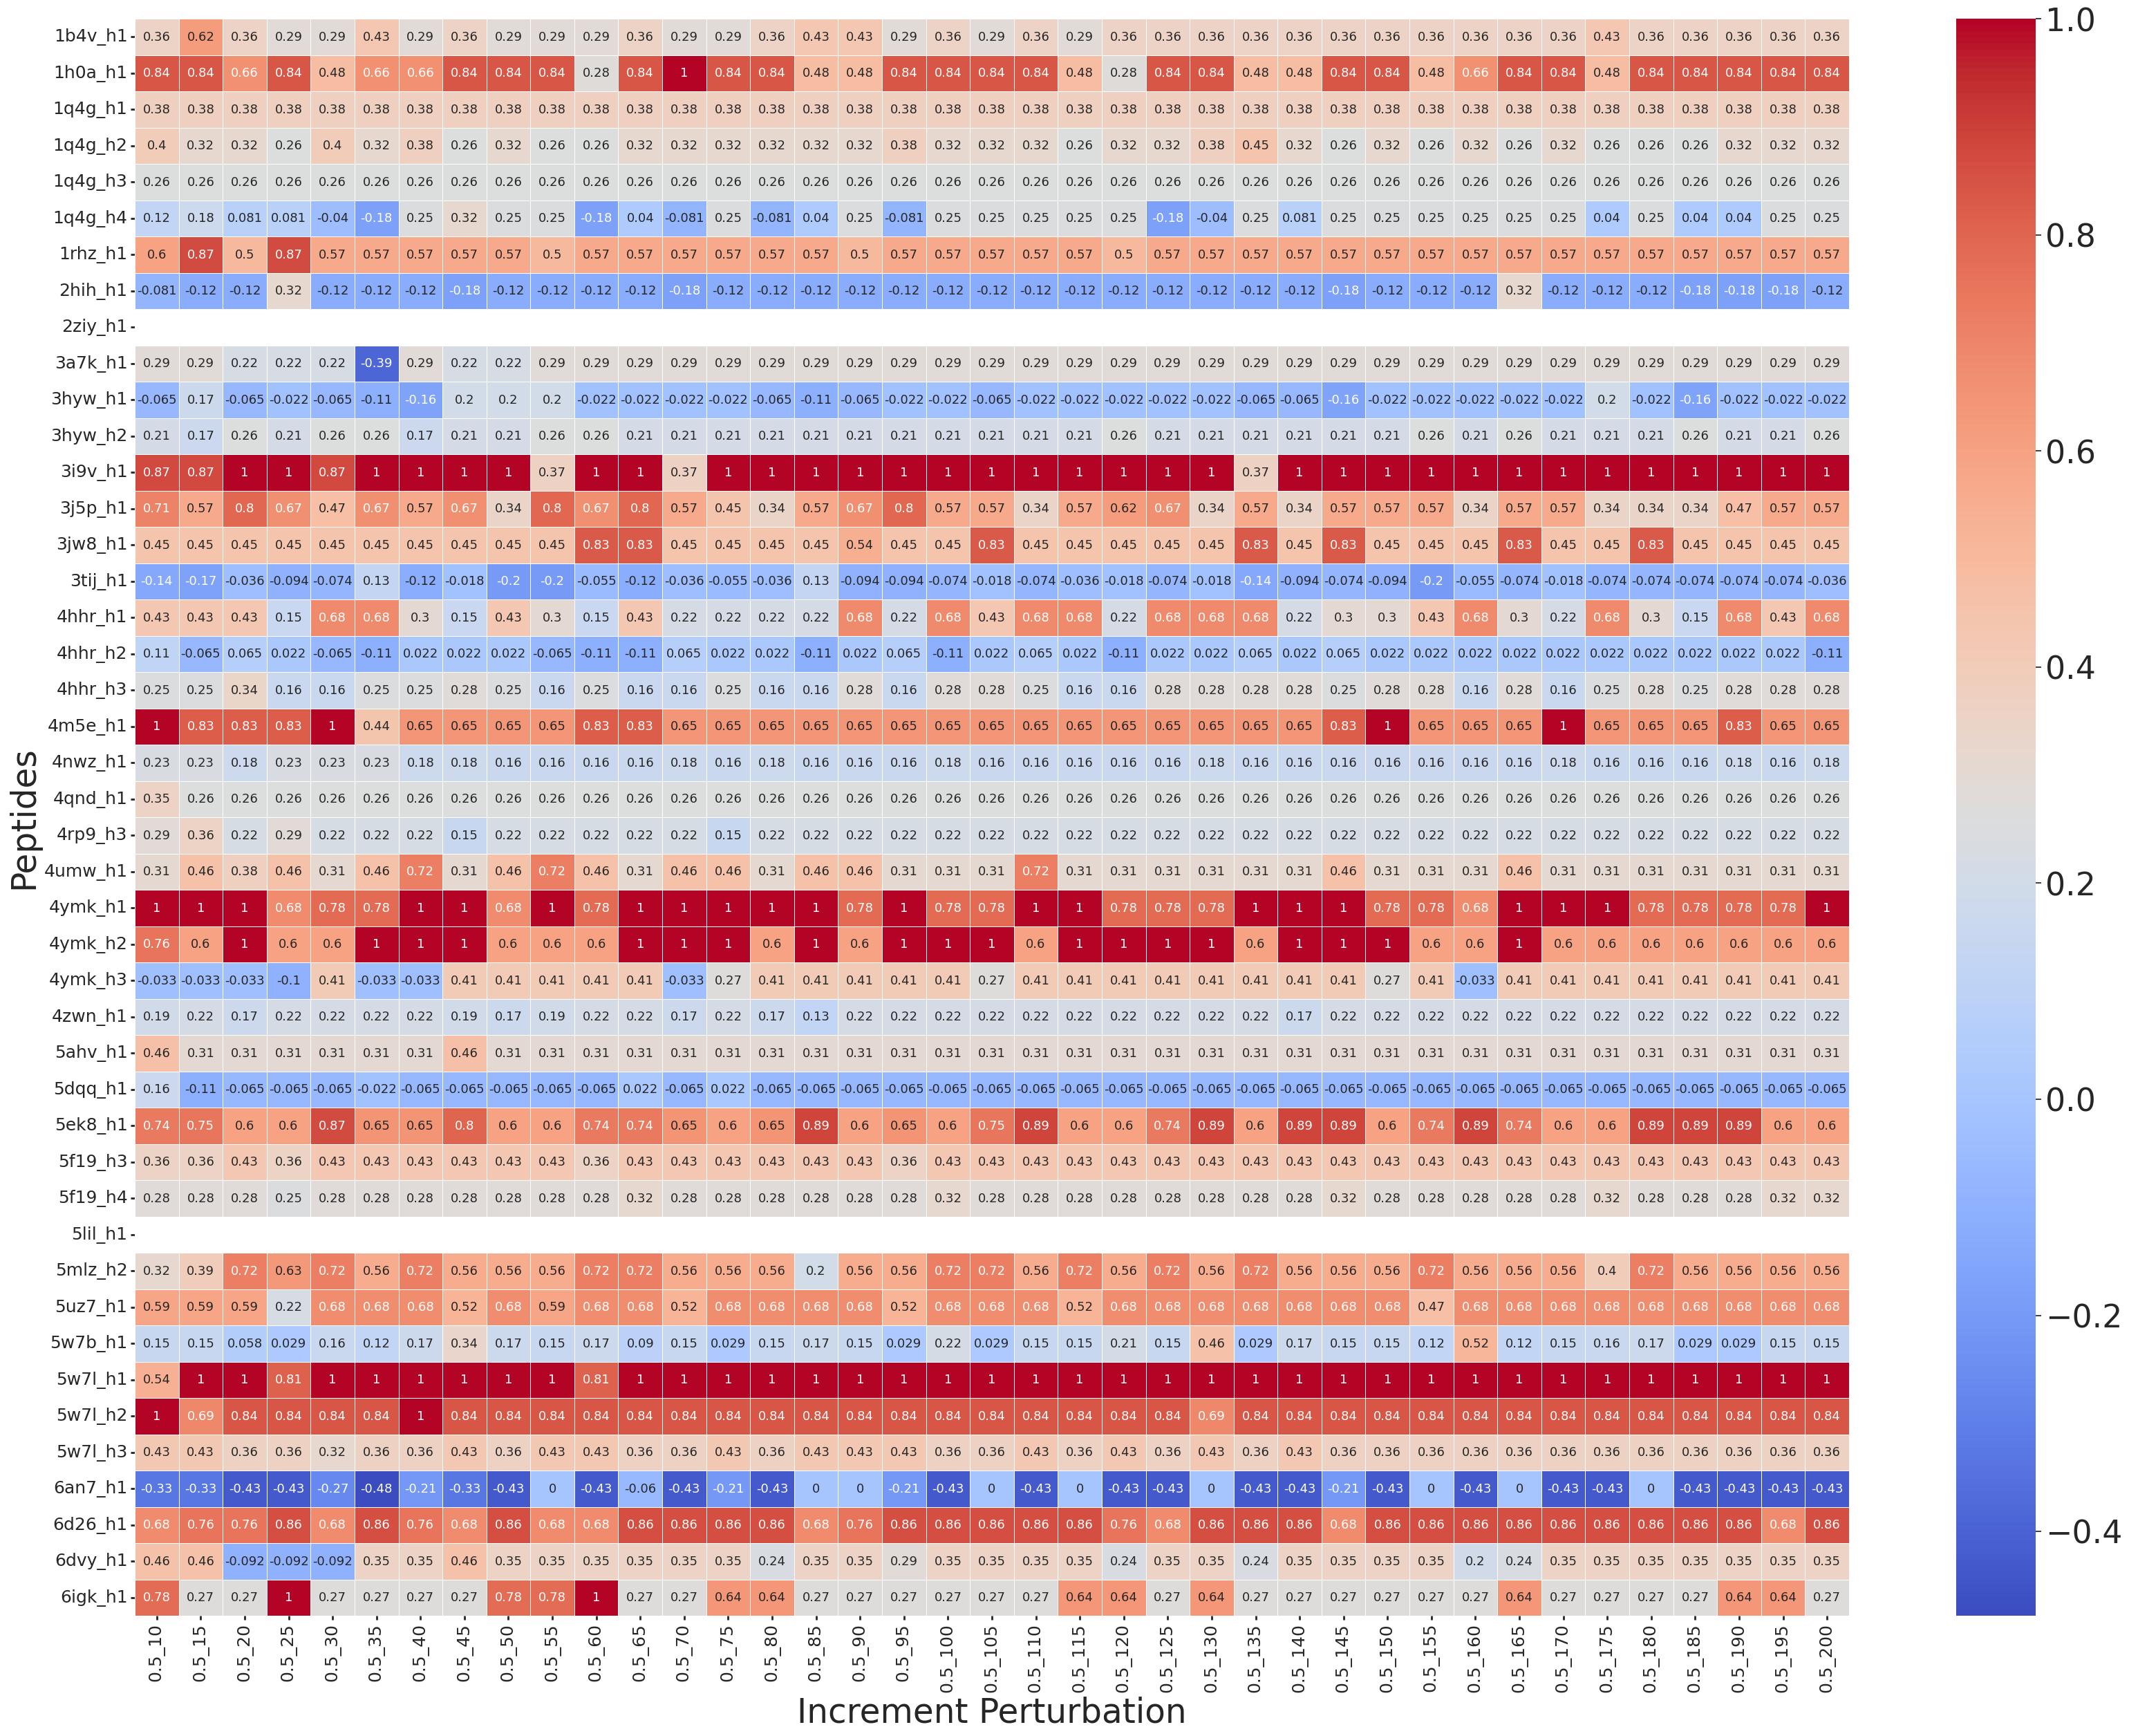

In [27]:
sns.set(font_scale=3)
sns.set_style('ticks')
sns.set_style('white', rc={'xtick.bottom': True,'ytick.left': True,})
sns.heatmap(dfr2, annot=True, linewidth=0.5, cmap="coolwarm_r", annot_kws={"fontsize":13},fmt='.2g')

plt.xlabel("Increment Perturbation", fontsize = 35)
plt.ylabel("Peptides", fontsize = 35)
plt.tick_params(axis='x', labelsize='18', length=4, width=2, rotation=90)
plt.tick_params(axis='y', labelsize='18', length=4, width=2, rotation=0)
plt.savefig("/home/cadeniran/ipn/figs/heatmaprg2.png", format='png', transparent=True, bbox_inches='tight')

## Make Plot: Results_grid.3

In [12]:
dfr3.set_index('ID', inplace=True)

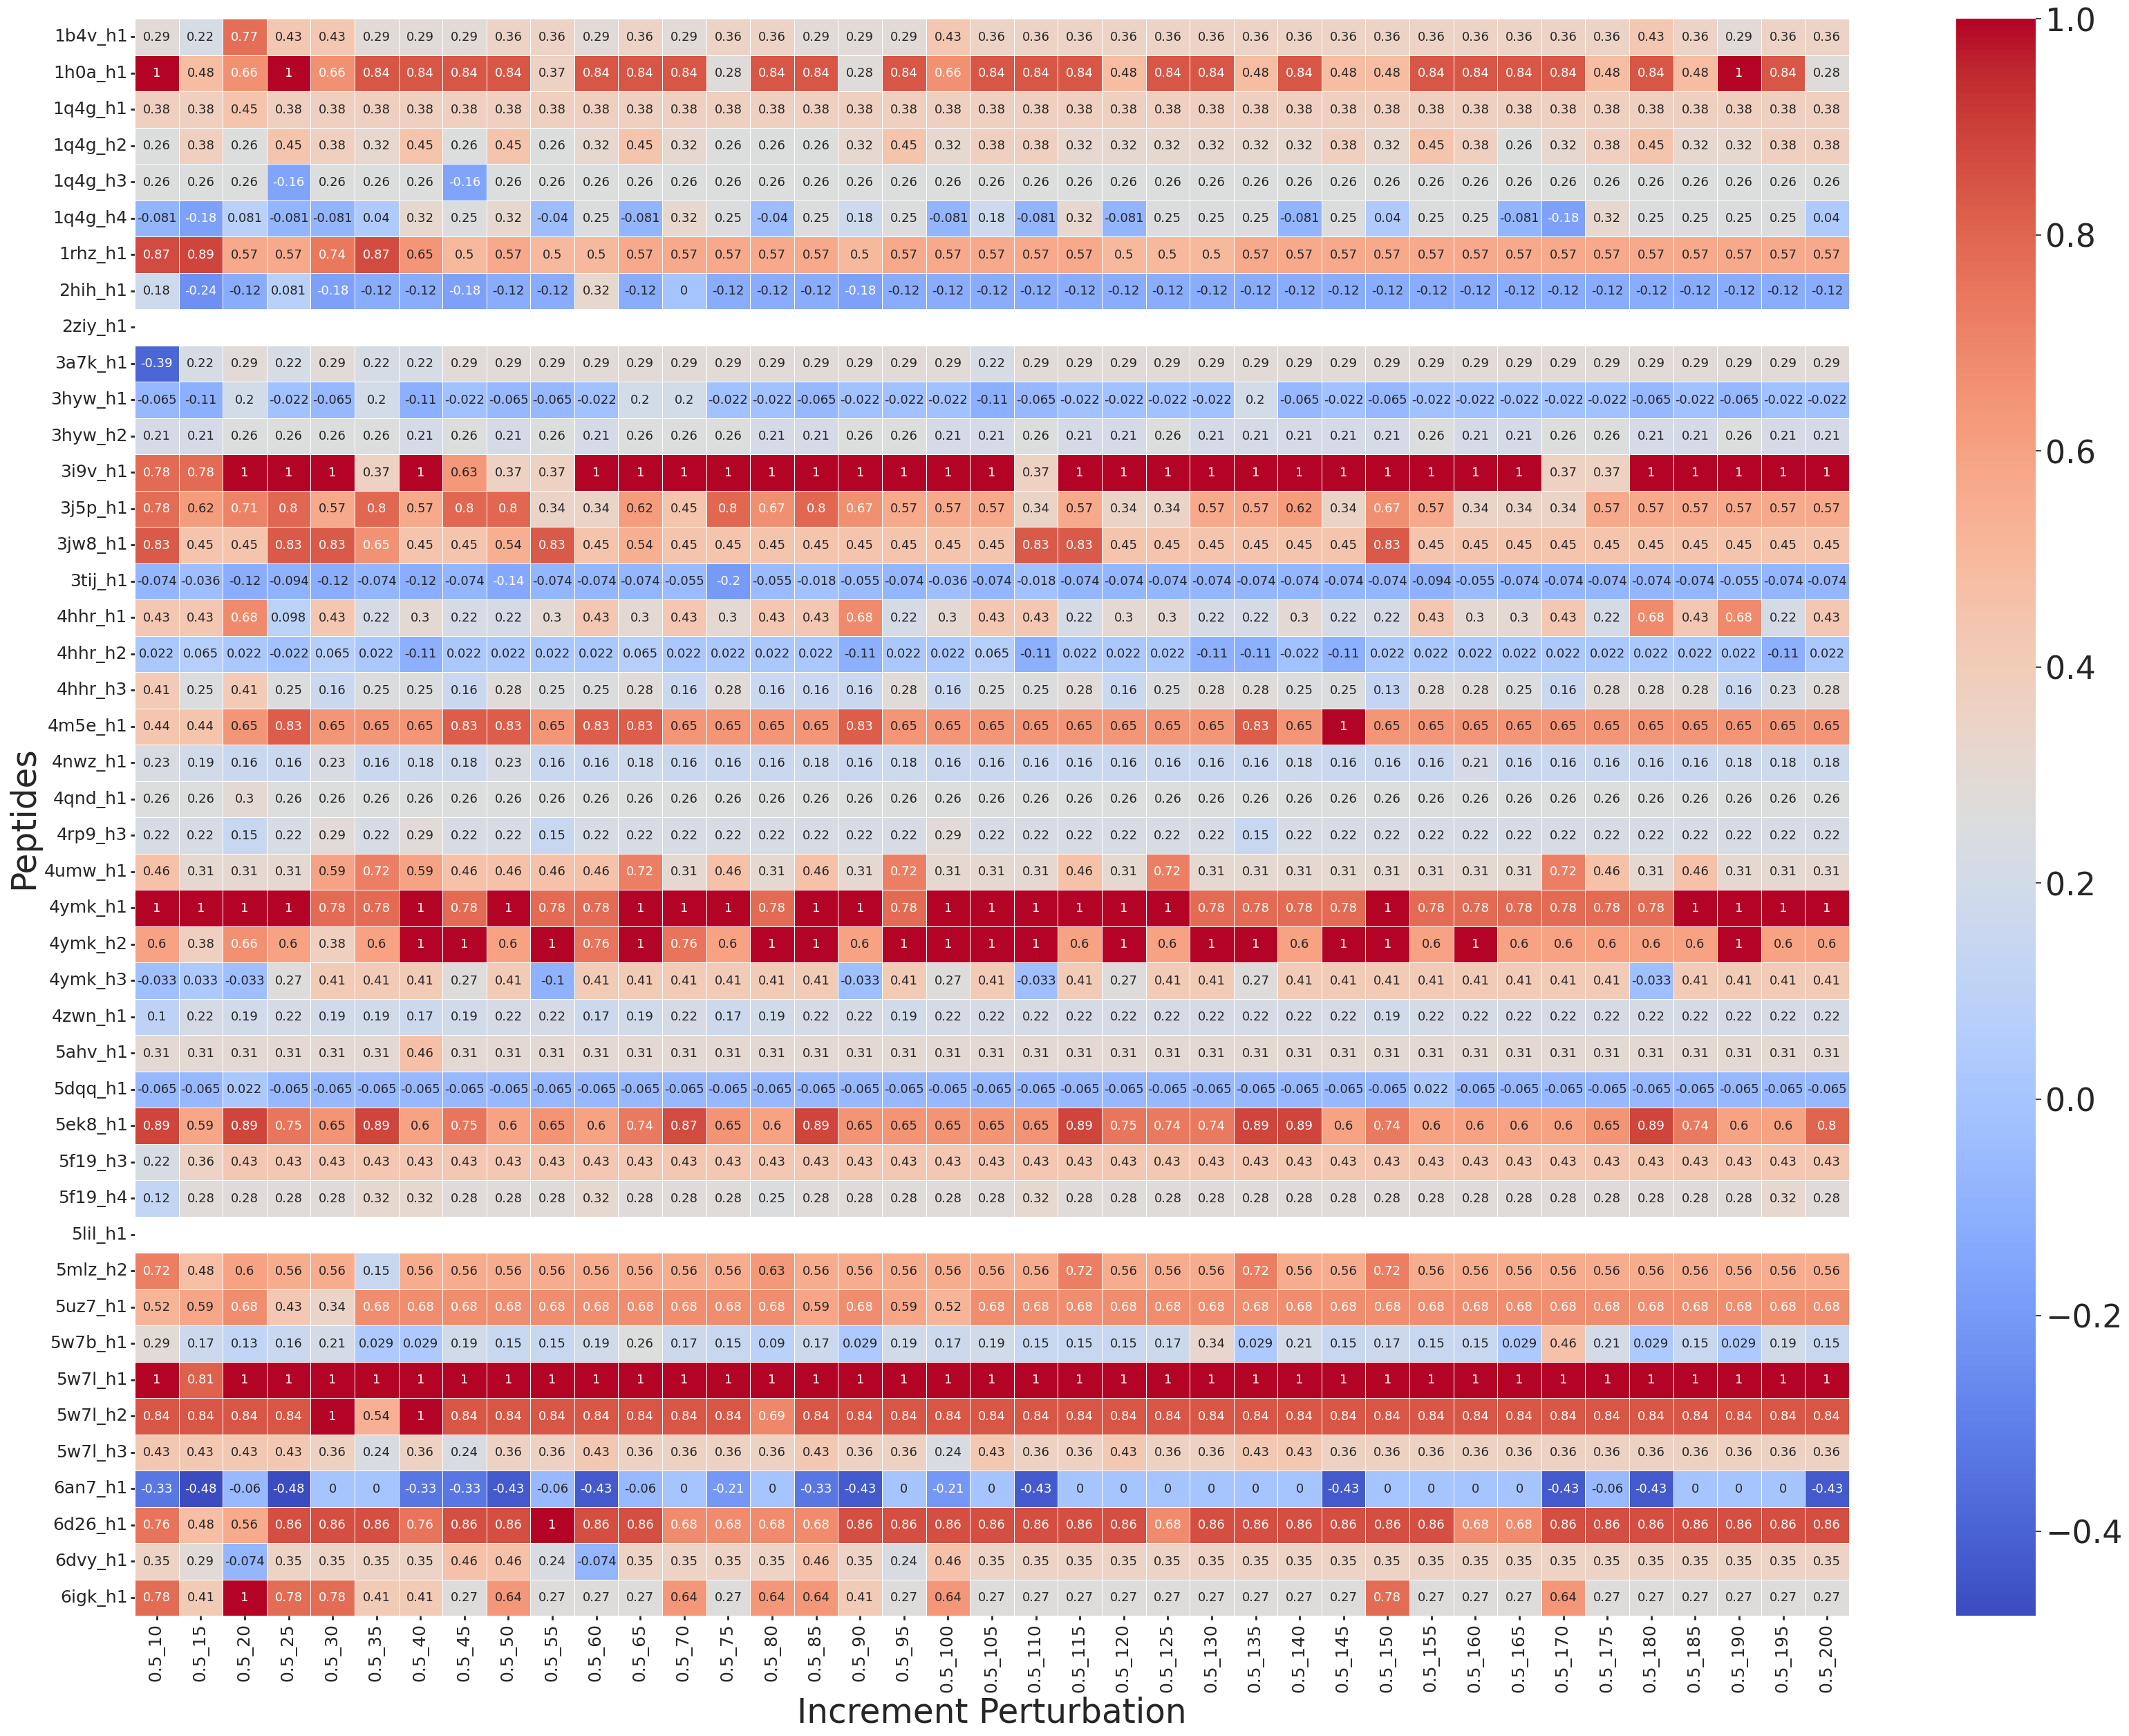

In [28]:
sns.set(font_scale=3)
sns.set_style('ticks')
sns.set_style('white', rc={'xtick.bottom': True,'ytick.left': True,})
sns.heatmap(dfr3, annot=True, linewidth=0.5, cmap="coolwarm_r", annot_kws={"fontsize":13},fmt='.2g')

plt.xlabel("Increment Perturbation", fontsize = 35)
plt.ylabel("Peptides", fontsize = 35)
plt.tick_params(axis='x', labelsize='18', length=4, width=2, rotation=90)
plt.tick_params(axis='y', labelsize='18', length=4, width=2, rotation=0)
plt.savefig("/home/cadeniran/ipn/figs/heatmaprg3.png", format='png', transparent=True, bbox_inches='tight')

### Save dataframe

In [ ]:
t1 = df.round(2)
t2 = dfat.round(2)

In [ ]:
os.chdir('/home/cadeniran/ipn/data')
t1.to_csv('MCC.csv', index=False)
t2.to_csv('MCCAT.csv', index=False)